**Nombre:** Maximiliano Nahuel Piedras Arcieri
# Parte 1
## Enunciado Asignado
**Enunciado 3:** dado el archivo de registros de jugadas (eventos) de MemPy, mostrar un gráfico que, dada una partida, muestre hasta 5 palabras con las que se jugó  y la cantidad de intentos  necesarios para encontrarlas. Para elegir la partida, deben mostrar los IDs  de partidas existentes en el dataset y solicitar que se ingrese la opción elegida.





In [25]:
from matplotlib import pyplot as plt      # se importan las librerías necesarias
import pandas as pd                       # para la ejecución del código.
import numpy as np
import os

**las siguientes líneas sirven para ubicar el archivo de datos, este debe encontrarse en la misma carpeta que el notebook. En caso contrario, hay que definir una nueva ruta.**

In [26]:
ruta = os.getcwd() + os.sep            # ruta donde se ejecuta el código
nombre_archivo = 'datos_prueba.csv'    # nombre del dataset que se está trabajando
ruta_archivo = ruta + nombre_archivo   # ruta directa para ubicar el archivo

**se utiliza un gráfico de barras apiladas ya que permite interpretar mejor la correspondencia entre una palabra, los intentos fallidos que hubo y si finalmente se encontró. También facilita la comparación con otras palabras.**

In [78]:
def cargar_grafico(datos):
    '''Esta función recibe los datos que se van a mostrar en el gráfico y con
    ello define las diferentes configuraciones propias del gráfico de barras.'''

    etiquetas = []         # voy agregando las etiquetas a medida que compruebo que no sean más de 5

    fallos = []            # la barra inferior indica la cantidad de intetnos fallidos
    correctas = []         # la barra superior indica que se encontró (será un solo intento siempre)

    for key, intentos in zip(datos.keys(), datos.values):    # para cada par de clave (palabra y estado) se comprueba si fue un error
        if len(etiquetas) != 5:                              # o si se encontró, en base a esto se van completando la lista de etiquetas,
            if not key[0] in etiquetas:                      # intentos fallidos y si se encontró o no. 
                etiquetas.append(key[0])

            if 'error' in key[1]:                            # las siguientes validaciones se hacen para que las listas de fallos
                fallos.append(intentos)                      # y correctas no queden de distintos tamaños, sino daría un fallo.
                if len(fallos) > len(correctas)+1:
                    correctas.append(0)
            else:
                if len(fallos) == len(correctas):
                    fallos.append(0)
                correctas.append(1)
        elif key[0] == etiquetas[-1]:
            correctas.append(1)
        else:
            break

    if len(fallos) > len(correctas):
        correctas.append(0)
    
    #print('Fallos: ', len(fallos))
    #print('Correctas: ', len(correctas))
    #print(f"Etiquetas: {etiquetas}")
    #print(f"Fallos: {fallos}")
    #print(f"Correctas: {correctas}")
    
    indice = np.arange(len(etiquetas))

    # creo barras base
    plt.bar(indice, fallos, label='Intento fallido')

    # creo barras superiores
    plt.bar(indice, correctas, label='Intento correcto', bottom=fallos)

    # defino 
    plt.xticks(indice, etiquetas)
    plt.ylabel("Intentos")
    plt.xlabel("Palabras")
    plt.title('Intentos fallidos por palabras y si se encontró')
    plt.legend('Grafico de Teoría x Python Plus')

    plt.show()

**en esta función principal, la solicitud para elegir un número de partida se vuelve a ejecutar si el usuario ingresa un número que no se corresponde con una partida u otro tipo de dato no numérico.**

In [80]:
def main():
    '''Funcion principal donde se leen los datos a trabajar, se muestran los IDs de partidas
    disponibles para elegir y se pide una elección. En base a la elección, se filtran los
    eventos de esa partida, se agrupa por palabras y se obtiene la cantidad de intentos que
    se necesitaron para encontrar los pares de fichas.'''

    try:
        df_datos = pd.read_csv(f"{ruta_archivo}")

        partidas_existentes = df_datos['Partida'].unique().tolist()
        print('IDs de partidas existentes: ', partidas_existentes)
        print()
        
        while True:
            try:
                id_partida = int(input('Seleccione sobre qué partida mostrar los datos: '))
                if id_partida not in partidas_existentes:
                    raise ValueError
                else:
                    break
            except ValueError:
                print('El valor ingresado es incorrecto o está fuera de rango, pruebe con otro.')
                print('-' * 75)

        datos = df_datos[df_datos['Partida'] == id_partida].groupby(['Palabra', 'Estado ']).size()

        cargar_grafico(datos)
        
    except FileNotFoundError:
        print(f"No se encontro la ruta del archivo en: {ruta_archivo}")

IDs de partidas existentes:  [1, 2, 3, 4, 5, 6, 7]

Seleccione sobre qué partida mostrar los datos: 7


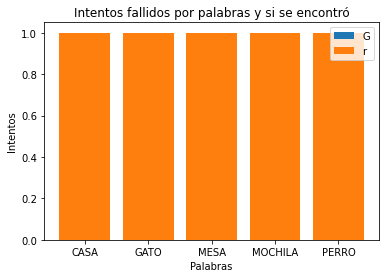

In [83]:
main()      # llamado al método main para iniciar la ejecución del programa